## Cos'è il settore agricolo in Italia?
[...]

## DATI FADN: distribuzione dimensione economica, terre SAU e coltivate, mondo lavorativo e ore di lavoro

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import statsmodels.api as sm
import matplotlib.patches as mpatches
import altair as alt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


C:\Users\beatr\AppData\Local\Temp\ipykernel_29384\2520750113.py:20: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
data_es = pd.read_excel("dim_economiche_reg.xlsx")
data_es

,Year,Member State,Region,Economic Size,Arable land (ha),Economic size N,Total Utilised Agricultural Area (ha)
0,2004,(IT) Italy,(221) Valle d'Aosta,(1) 2 000 < 8 000 EUR,3.45,6.3,3.91
1,2004,(IT) Italy,(221) Valle d'Aosta,(2) 8 000 < 25 000 EUR,13.75,15.0,17.43
2,2004,(IT) Italy,(221) Valle d'Aosta,(3) 25 000 < 50 000 EUR,61.59,36.0,88.72
3,2004,(IT) Italy,(221) Valle d'Aosta,(4) 50 000 < 100 000 EUR,160.33,66.7,176.96
4,2004,(IT) Italy,(221) Valle d'Aosta,(5) 100 000 < 500 000 EUR,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2159,2022,(IT) Italy,(311) Puglia,(2) 8 000 < 25 000 EUR,4.56,17.4,8.01
2160,2022,(IT) Italy,(311) Puglia,(3) 25 000 < 50 000 EUR,8.71,36.4,15.20
2161,2022,(IT) Italy,(311) Puglia,(4) 50 000 < 100 000 EUR,13.15,73.1,24.82
2162,2022,(IT) Italy,(311) Puglia,(5) 100 000 < 500 000 EUR,29.55,178.9,49.66


In [3]:
data_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   2164 non-null   int64  
 1   Member State                           2164 non-null   object 
 2   Region                                 2164 non-null   object 
 3   Economic Size                          2164 non-null   object 
 4   Arable land (ha)                       1991 non-null   float64
 5   Economic size N                        1991 non-null   float64
 6   Total Utilised Agricultural Area (ha)  1991 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 118.5+ KB


In [4]:
data_es.isnull().sum()

Year                                       0
Member State                               0
Region                                     0
Economic Size                              0
Arable land (ha)                         173
Economic size N                          173
Total Utilised Agricultural Area (ha)    173
dtype: int64

In [5]:
rows_mv = data_es[data_es.isnull().any(axis=1)]
rows_mv

,Year,Member State,Region,Economic Size,Arable land (ha),Economic size N,Total Utilised Agricultural Area (ha)
4,2004,(IT) Italy,(221) Valle d'Aosta,(5) 100 000 < 500 000 EUR,NaN,NaN,NaN
11,2004,(IT) Italy,(241) Trentino,(1) 2 000 < 8 000 EUR,NaN,NaN,NaN
16,2004,(IT) Italy,(241) Trentino,(6) >= 500 000 EUR,NaN,NaN,NaN
23,2004,(IT) Italy,(242) Alto Adige,(1) 2 000 < 8 000 EUR,NaN,NaN,NaN
28,2004,(IT) Italy,(242) Alto Adige,(6) >= 500 000 EUR,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2007,2021,(IT) Italy,(250) Liguria,(6) >= 500 000 EUR,NaN,NaN,NaN
2046,2021,(IT) Italy,(320) Sicilia,(6) >= 500 000 EUR,NaN,NaN,NaN
2075,2022,(IT) Italy,(241) Trentino,(6) >= 500 000 EUR,NaN,NaN,NaN
2109,2022,(IT) Italy,(250) Liguria,(6) >= 500 000 EUR,NaN,NaN,NaN


In [6]:
economic_size_counts = rows_mv['Economic Size'].value_counts()
economic_size_counts

(6) >= 500 000 EUR            121
(1) 2 000  < 8 000 EUR         48
(5) 100 000  < 500 000 EUR      3
(2) 8 000  < 25 000 EUR         1
Name: Economic Size, dtype: int64

Vediamo che i dati maggiormente mancanti sono per le due tipologie di valori massimi di dimensione Economica. 
Onde evitare visualizzazioni poco chiare, eliminiamo del tutto i due valori. 

In [87]:
data_es.dropna(inplace=True)
data_es

,Year,Member State,Region,Economic Size,Arable land (ha),Economic size N,Total Utilised Agricultural Area (ha),Cluster,Economic Size Encoded
0,2004,(IT) Italy,(221) Valle d'Aosta,(1) 2 000 < 8 000 EUR,3.45,6.3,3.91,0,0
1,2004,(IT) Italy,(221) Valle d'Aosta,(2) 8 000 < 25 000 EUR,13.75,15.0,17.43,0,1
2,2004,(IT) Italy,(221) Valle d'Aosta,(3) 25 000 < 50 000 EUR,61.59,36.0,88.72,1,2
3,2004,(IT) Italy,(221) Valle d'Aosta,(4) 50 000 < 100 000 EUR,160.33,66.7,176.96,1,3
5,2004,(IT) Italy,(222) Piemonte,(1) 2 000 < 8 000 EUR,3.59,6.8,4.49,0,0
...,...,...,...,...,...,...,...,...,...
2159,2022,(IT) Italy,(311) Puglia,(2) 8 000 < 25 000 EUR,4.56,17.4,8.01,0,1
2160,2022,(IT) Italy,(311) Puglia,(3) 25 000 < 50 000 EUR,8.71,36.4,15.20,0,2
2161,2022,(IT) Italy,(311) Puglia,(4) 50 000 < 100 000 EUR,13.15,73.1,24.82,0,3
2162,2022,(IT) Italy,(311) Puglia,(5) 100 000 < 500 000 EUR,29.55,178.9,49.66,2,4


In [56]:
data_es_m = data_es.melt(id_vars=['Year', 'Economic Size'], 
                    value_vars=['Arable land (ha)', 'Total Utilised Agricultural Area (ha)'], 
                    var_name='Land Type', 
                    value_name='Area (ha)')

In [57]:
chart = alt.Chart(data_es_m).mark_bar().encode(
    x='Year:O',
    y='Area (ha):Q',
    color='Land Type:N',
    column='Economic Size:N',
    tooltip=['Year', 'Economic Size', 'Land Type', 'Area (ha)']
).properties(
    width=500,
    height=700,
    title='Total Arable Land and Utilised Agricultural Area by Year and Economic Size'
).interactive()

chart

alt.Chart(...)

In [78]:
numerical_features = ['Arable land (ha)', 'Economic size N', 'Total Utilised Agricultural Area (ha)']
categorical_features = ['Economic Size']

In [72]:
%%time
sse_list = []
for k in range(2, 20):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(numeric_columns)
    sse_list.append(kmeans.inertia_)

C:\Users\beatr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\beatr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\beatr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\beatr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

CPU times: total: 4min 7s
Wall time: 20 s


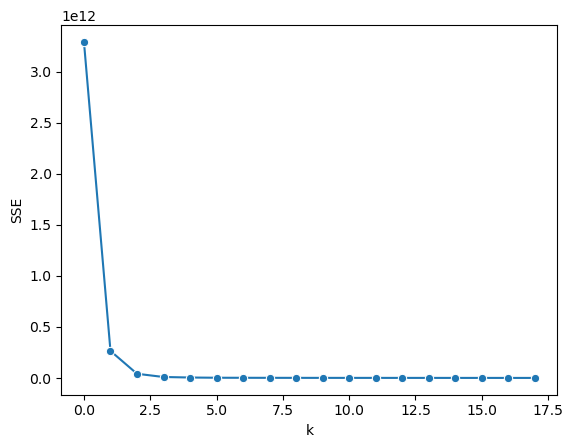

In [73]:
sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o')
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()

In [76]:
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(numeric_columns)
    print(f'k={k}, SSE={kmeans.inertia_}, Silhouette Score={silhouette_score(numeric_columns, kmeans.labels_)}')

C:\Users\beatr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


k=2, SSE=3291296162114.713, Silhouette Score=0.8278059318706313


C:\Users\beatr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


k=3, SSE=264865038493.2893, Silhouette Score=0.9275825890246145


C:\Users\beatr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


k=4, SSE=41150982735.1572, Silhouette Score=0.8926950076110285


C:\Users\beatr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


k=5, SSE=9627370040.750242, Silhouette Score=0.9697353400864864


C:\Users\beatr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


k=6, SSE=4477001780.804835, Silhouette Score=0.8952202798354736


C:\Users\beatr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


k=7, SSE=2345170602.3426685, Silhouette Score=0.8999635570887398


C:\Users\beatr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


k=8, SSE=1790797289.960056, Silhouette Score=0.8823448373472377


C:\Users\beatr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


k=9, SSE=1456562263.3990877, Silhouette Score=0.8721052595739848


C:\Users\beatr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


k=10, SSE=1148447645.5836732, Silhouette Score=0.7785302784689229


In [88]:
numerical_columns = ['Arable land (ha)', 'Economic size N', 'Total Utilised Agricultural Area (ha)']
data_numeric = data_es[numerical_columns]

le = LabelEncoder()
data_es['Economic Size Encoded'] = le.fit_transform(data_es['Economic Size'])

# Standardize the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Combine encoded categorical and scaled numerical data
data_cluster = pd.concat([data_es[['Economic Size Encoded']], pd.DataFrame(data_scaled, columns=numerical_columns)], axis=1)

# Perform K-Means clustering with 3 clusters (adjust as needed)
kmeans = KMeans(n_clusters=3, random_state=0)
data_cluster['Cluster'] = kmeans.fit_predict(data_cluster)

# Plot the clusters using Altair
scatter_plot = alt.Chart(data_cluster).mark_circle(size=60).encode(
    x=alt.X('Arable land (ha):Q', title="Arable Land (ha)"),
    y=alt.Y('Total Utilised Agricultural Area (ha):Q', title="Total Utilized Agricultural Area (ha)"),
    color=alt.Color('Cluster:N', scale=alt.Scale(scheme='category10')),
    tooltip=['Arable land (ha)', 'Total Utilised Agricultural Area (ha)', 'Cluster', 'Economic Size (Original)', le.inverse_transform(data_cluster['Economic Size Encoded'])]
).interactive()

scatter_plot.properties(
    width=600,
    height=400,
    title='K-Means Clustering of Agricultural Data (Encoded Economic Size)'
)

# Display the plot
scatter_plot


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [89]:
print(data_es.isnull().sum())

Year                                     0
Member State                             0
Region                                   0
Economic Size                            0
Arable land (ha)                         0
Economic size N                          0
Total Utilised Agricultural Area (ha)    0
Cluster                                  0
Economic Size Encoded                    0
dtype: int64


##### Iniziamo l'analisi guardando alla paga oraria dei lavoratori del settore agricolo, suddivsi per contratti intedeteminati e determinati, per momento di lavoro e contratto lavorativo. 

In [10]:
## Ricaviamo dei semplici dataset dal report del CISL (FAI)

data_determinato = {
    'LAVORO ORDINARIO': [15.28, 14.50, 13.65, 13.00, 12.25, 10.79, 8.68],
    'LAVORO STRAORD.': [18.21, 17.28, 16.27, 15.49, 14.60, 12.86, 10.35],
    'LAVORO FESTIVO': [19.38, 18.39, 17.31, 16.49, 15.54, 13.69, 11.01],
    'LAVORO NOT.E STR.FEST.': [19.97, 18.94, 17.83, 16.98, 16.01, 14.10, 11.34],
    'LAVORO FEST.NOTT.': [21.14, 20.06, 18.88, 17.98, 16.95, 14.93, 12.01]
}

df_determinato = pd.DataFrame(data_determinato)
df_determinato.index = ['livello 1', 'livello 2', 'livello 3', 'livello 4', 'livello 5', 'livello 6', 'livello 7']

In [11]:
data_indeterminato = {
    'LAVORO ORDINARIO': [11.72, 11.11, 10.46, 9.96, 9.39, 8.28, 6.66],
    'LAVORO STRAORD.': [14.65, 13.89, 13.08, 12.45, 11.74, 10.35, 8.33],
    'LAVORO FESTIVO': [15.82, 15.00, 14.12, 13.45, 12.68, 11.18, 8.99],
    'LAVORO NOT.E STR.FEST.': [16.41, 15.55, 14.64, 13.94, 13.15, 11.59, 9.32],
    'LAVORO FEST.NOTT.': [17.58, 16.67, 15.69, 14.94, 14.09, 12.42, 9.99]
}

df_indeterminato = pd.DataFrame(data_indeterminato)
df_indeterminato.index = ['livello 1', 'livello 2', 'livello 3', 'livello 4', 'livello 5', 'livello 6', 'livello 7']

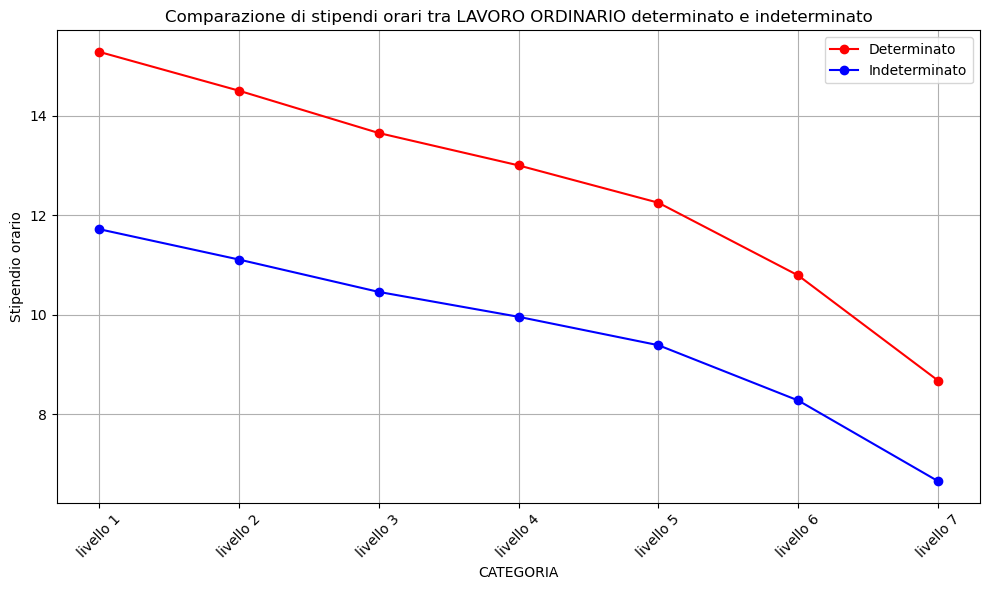

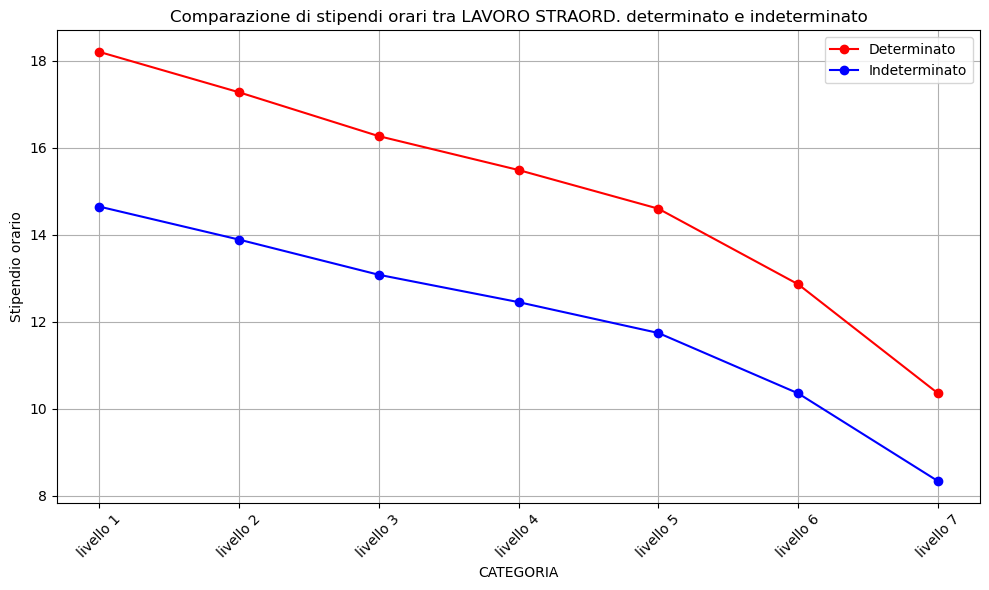

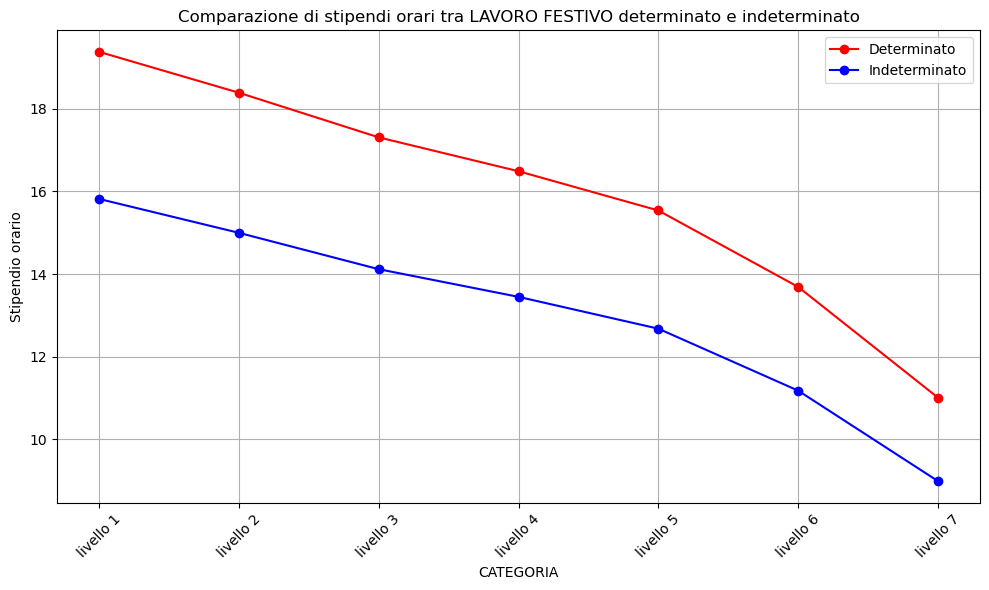

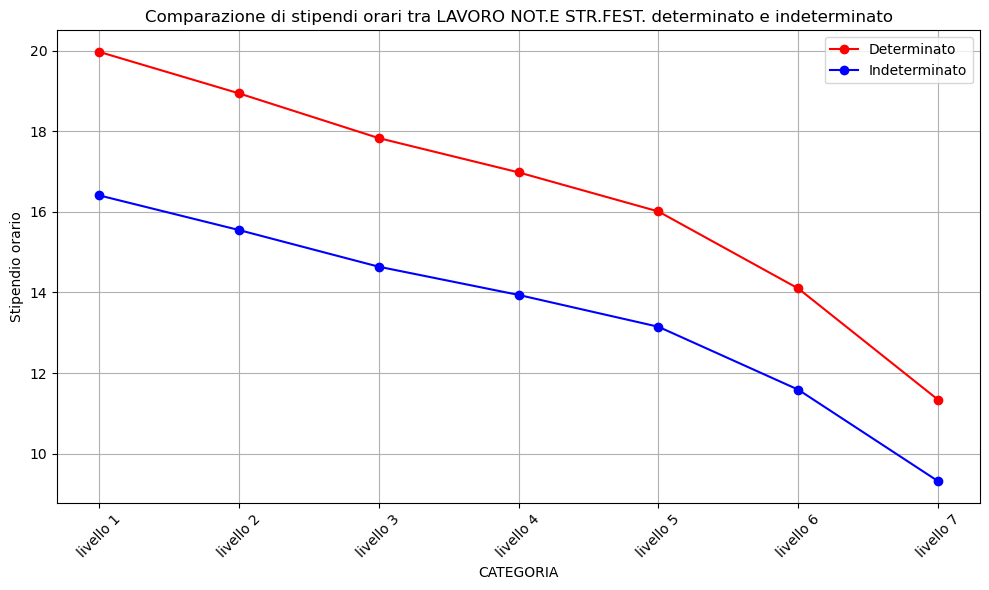

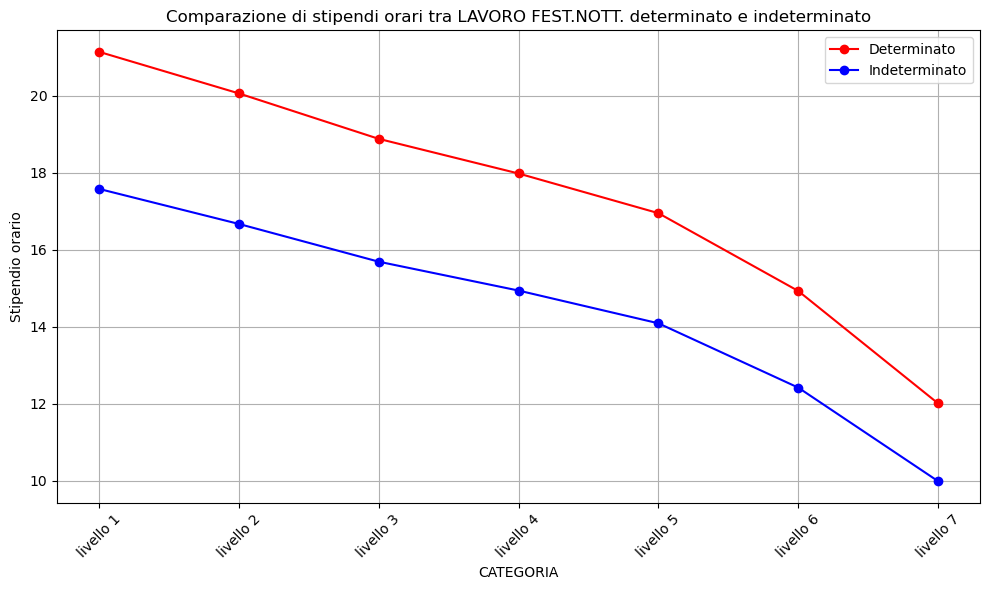

In [12]:
for lavoro in df_determinato.columns:
    plt.figure(figsize=(10, 6))
    
    # Determinato plot
    plt.plot(df_determinato.index, df_determinato[lavoro], marker='o', color='r', label='Determinato')
    
    # Indeterminato plot
    plt.plot(df_indeterminato.index, df_indeterminato[lavoro], marker='o', color='b', label='Indeterminato')
    
    plt.title(f'Comparazione di stipendi orari tra {lavoro} determinato e indeterminato')
    plt.xlabel('CATEGORIA')
    plt.ylabel('Stipendio orario')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


Eppure, questo spaccato non riesce a restituire molto, al di là di una normale differenza retributiva tra determinato e indeterminato, nonché tra diversi tipi di contratto. Una riflessione fondamentale che si articola a partire dai dati della FADN riguarda il numero di ore effettivamente retribuite. 

"The farm accountancy data network (FADN) monitors farms' income and business activities. It is also an important informative source for understanding the impact of the measures taken under the common agricultural policy. 

FADN is the only source of microeconomic data based on harmonised bookkeeping principles. It is based on national surveys and only covers EU agricultural holdings which, due to their size, can be considered commercial.

The methodology applied aims to provide representative data according to three categories: region, economic size and type of farming."

Leggiamo così sul portale EU riguardo i dati dell'agricoltura. 
I dati che abbiamo estratto sono quelli riguardanti esclusivamente l'Italia, suddivisi in tipologie di agricoltura, dimensione economica dell'azienda agriola, e le ore di lavoro, suddivise in totali e non retribuite.
Infatti, il seguente lavoro vuole essere un'analisi delle condizioni lavorative degli addetti all'agricoltura, guardando ai dati disaggregati per fatturato della ditta. Riteniamo infatti fondamentale capire il complesso tessuto di proteste agricole alla luce dei differenti trattamenti lavorativi.

In [13]:
data = pd.read_excel('Ita labour paidunpaid.xlsx')
data.head()

,Year,Types of Farming,Economic Size (Mean),Unpaid labour input (AWU),Unpaid labour input (hrs),Total labour input (AWU),Labour input (hrs)
0,2004,Fieldcrops,16500,0.99,2233.55,1.05,2356.27
1,2004,(1) Fieldcrops,37500,1.25,2847.01,1.43,3230.62
2,2004,(1) Fieldcrops,75000,1.37,3167.89,1.80,4042.39
3,2004,(1) Fieldcrops,300000,1.61,3732.11,3.22,7082.63
4,2004,(1) Fieldcrops,500000,1.38,3231.04,12.00,24262.36


https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:European_size_unit_(ESU)

Annual work unit (AWU) is the full-time equivalent employment, i.e. the total hours worked divided by the average annual hours worked in full-time jobs in the country. One annual work unit corresponds to the work performed by one person who is occupied on an agricultural holding on a full-time basis.

European size unit, abbreviated as ESU, is a standard gross margin of EUR 1 200 that is used to express the economic size of an agricultural holding or farm. https://fadn.mps.hr/en/metodologija/

In [14]:
data['Types of Farming'] = data['Types of Farming'].apply(lambda x: re.sub(r'\(\d\)', '', x))

In [15]:
data.head()

,Year,Types of Farming,Economic Size (Mean),Unpaid labour input (AWU),Unpaid labour input (hrs),Total labour input (AWU),Labour input (hrs)
0,2004,Fieldcrops,16500,0.99,2233.55,1.05,2356.27
1,2004,Fieldcrops,37500,1.25,2847.01,1.43,3230.62
2,2004,Fieldcrops,75000,1.37,3167.89,1.80,4042.39
3,2004,Fieldcrops,300000,1.61,3732.11,3.22,7082.63
4,2004,Fieldcrops,500000,1.38,3231.04,12.00,24262.36


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       760 non-null    int64  
 1   Types of Farming           760 non-null    object 
 2   Economic Size (Mean)       760 non-null    int64  
 3   Unpaid labour input (AWU)  739 non-null    float64
 4   Unpaid labour input (hrs)  739 non-null    float64
 5   Total labour input (AWU)   739 non-null    float64
 6   Labour input (hrs)         739 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 41.7+ KB


In [17]:
data.isnull().sum() 

Year                          0
Types of Farming              0
Economic Size (Mean)          0
Unpaid labour input (AWU)    21
Unpaid labour input (hrs)    21
Total labour input (AWU)     21
Labour input (hrs)           21
dtype: int64

In [18]:
rows_with_missing_values = data[data.isnull().any(axis=1)]
rows_with_missing_values

,Year,Types of Farming,Economic Size (Mean),Unpaid labour input (AWU),Unpaid labour input (hrs),Total labour input (AWU),Labour input (hrs)
30,2004,Granivores,16500,NaN,NaN,NaN,NaN
70,2005,Granivores,16500,NaN,NaN,NaN,NaN
110,2006,Granivores,16500,NaN,NaN,NaN,NaN
150,2007,Granivores,16500,NaN,NaN,NaN,NaN
174,2008,Wine,500000,NaN,NaN,NaN,NaN
190,2008,Granivores,16500,NaN,NaN,NaN,NaN
192,2008,Granivores,75000,NaN,NaN,NaN,NaN
230,2009,Granivores,16500,NaN,NaN,NaN,NaN
231,2009,Granivores,37500,NaN,NaN,NaN,NaN
270,2010,Granivores,16500,NaN,NaN,NaN,NaN


Dal momento che ad avere valori mancanti sono righe interamente prive di dati sui valori di nostro interesse, eliminiamo in toto le righe. 

In [19]:
data.dropna(inplace=True)

In [20]:
data.dtypes

Year                           int64
Types of Farming              object
Economic Size (Mean)           int64
Unpaid labour input (AWU)    float64
Unpaid labour input (hrs)    float64
Total labour input (AWU)     float64
Labour input (hrs)           float64
dtype: object

In [21]:
data['Year'] = data['Year'].astype(str).str[:4]  # Extract first 4 characters
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')  # Convert to numeric type

In [22]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y').dt.year

In [23]:
summed_data = data.groupby(['Year', 'Economic Size (Mean)'])['Unpaid labour input (AWU)', 'Total labour input (AWU)'].sum().reset_index()
summed_data

C:\Users\beatr\AppData\Local\Temp\ipykernel_29384\3483611193.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summed_data = data.groupby(['Year', 'Economic Size (Mean)'])['Unpaid labour input (AWU)', 'Total labour input (AWU)'].sum().reset_index()


,Year,Economic Size (Mean),Unpaid labour input (AWU),Total labour input (AWU)
0,2004,16500,7.51,8.11
1,2004,37500,10.50,11.67
2,2004,75000,12.59,15.51
3,2004,300000,14.26,27.27
4,2004,500000,17.36,77.73
...,...,...,...,...
90,2022,16500,6.29,6.66
91,2022,37500,8.92,9.88
92,2022,75000,9.59,11.76
93,2022,300000,12.25,19.10


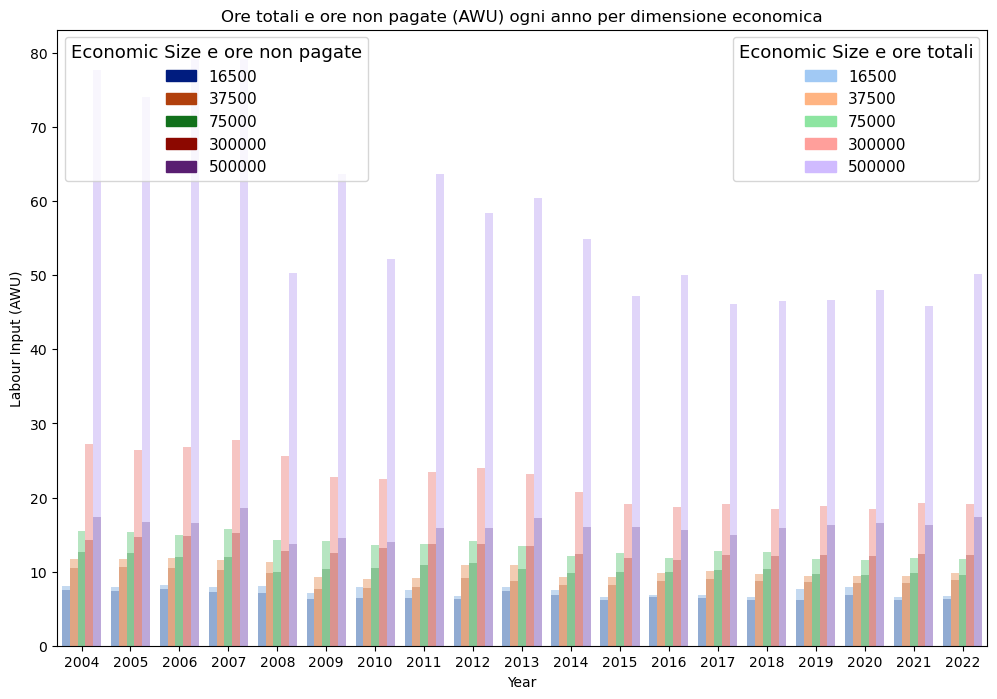

In [24]:
economic_size_labels = [str(label) for label in summed_data['Economic Size (Mean)'].unique()]
summed_data['Economic Size (Mean)'] = summed_data['Economic Size (Mean)'].astype(str)

unpaid_palette = sns.color_palette("dark", len(economic_size_labels))
total_palette = sns.color_palette("pastel", len(economic_size_labels))

plt.figure(figsize=(12, 8))
sns.barplot(data=summed_data, x='Year', y='Unpaid labour input (AWU)', hue='Economic Size (Mean)', palette=unpaid_palette, alpha=0.7)
sns.barplot(data=summed_data, x='Year', y='Total labour input (AWU)', hue='Economic Size (Mean)', palette=total_palette, alpha=0.7)
plt.title('Ore totali e ore non pagate (AWU) ogni anno per dimensione economica')
plt.xlabel('Year')
plt.ylabel('Labour Input (AWU)')

unpaid_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(unpaid_palette, economic_size_labels)]
total_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(total_palette, economic_size_labels)]

unpaid_legend = plt.legend(title='Economic Size e ore non pagate', title_fontsize='13', fontsize='11', loc='upper left', handles=unpaid_handles)
total_legend = plt.legend(title='Economic Size e ore totali', title_fontsize='13', fontsize='11', loc='upper right', handles=total_handles)

plt.gca().add_artist(unpaid_legend)
plt.show()


Con la palette pastello sono indicate le work-unit, ovvero le ore totali divise per il numro medio di ore lavorative annue; mentre con la palette più scura sono indicate le work-unit non pagate. 
Ciò che si nota, al di là di un diverso impiego orario per le aziende agricole con un fatturato annuo superiore o uguale ai 500 000 €, è che il numero di ore non retribuito è rimasto costante. Inoltre, le work-unit non retribuite sono maggiori nelle aziende con un numero totale di work-unit più basso, rasentando addirittura la metà o più del totale.

Queste unità di lavoro rappresentano le imprese familiari, in cui la produzione è direttamente destinata alla vendita per autosussistenza. Questa tipologia di lavoratori agricoli è superiore alla media europea. 

In [25]:
data_family = pd.read_excel("income family work - eu it.xlsx")

In [26]:
data_family_long = data_family.melt(id_vars=['TIME_PERIOD'], var_name='region', value_name='value')

base = alt.Chart(data_family_long).encode(
    x=alt.X('TIME_PERIOD:O', title='Year', axis=alt.Axis(labelAngle=45)),
    y=alt.Y('value:Q', title='Value'),
    color='region:N'
).properties(
    width=800,
    title='Italy vs. EU Family Data'
)

line_plot = base.mark_line(point=True).interactive()
line_plot.display()

alt.Chart(...)

Guardiamo ai valori della correlazinoe tra dimensioni delle industrie e ore non pagate.

In [27]:
data['Unpaid proportion'] = data['Unpaid labour input (AWU)'] / data['Total labour input (AWU)']

In [28]:
data

,Year,Types of Farming,Economic Size (Mean),Unpaid labour input (AWU),Unpaid labour input (hrs),Total labour input (AWU),Labour input (hrs),Unpaid proportion
0,2004,Fieldcrops,16500,0.99,2233.55,1.05,2356.27,0.942857
1,2004,Fieldcrops,37500,1.25,2847.01,1.43,3230.62,0.874126
2,2004,Fieldcrops,75000,1.37,3167.89,1.80,4042.39,0.761111
3,2004,Fieldcrops,300000,1.61,3732.11,3.22,7082.63,0.500000
4,2004,Fieldcrops,500000,1.38,3231.04,12.00,24262.36,0.115000
...,...,...,...,...,...,...,...,...
755,2022,Mixed,16500,0.90,2050.45,0.92,2097.27,0.978261
756,2022,Mixed,37500,1.12,2564.66,1.21,2763.89,0.925620
757,2022,Mixed,75000,1.41,3336.04,1.59,3735.94,0.886792
758,2022,Mixed,300000,1.57,3642.13,2.15,4903.56,0.730233


In [29]:
numeric_columns = data.drop(columns=['Year']).select_dtypes(include=['float64', 'int64'])

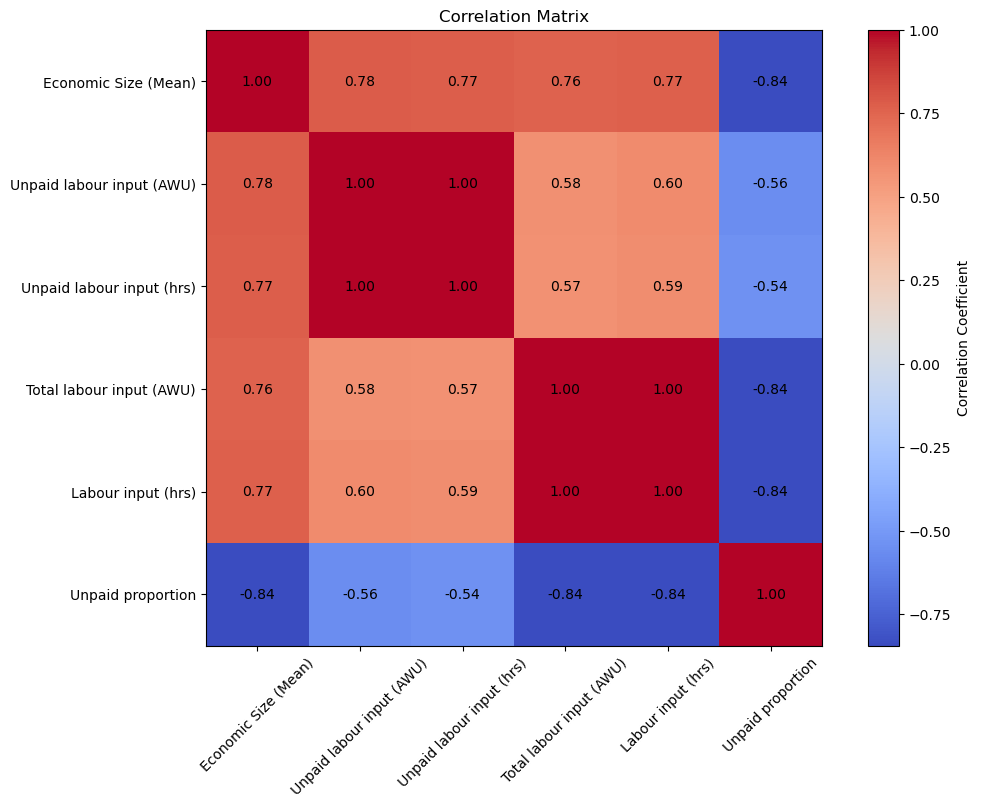

In [30]:
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")

plt.colorbar(label='Correlation Coefficient')
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')

plt.show()

Come visto nel precedente grafico, possiamo stabilire una correlazione forte tra la dimensione economica delle aziende e la proporzione di ore non pagate. Dal momento che il coefficiente è negativo, si conferma che al diminuire del fatturato dell'azienza, le ore non pagate crescono.

In [31]:
x = data['Unpaid proportion'].values.reshape(-1, 1)
y = data['Economic Size (Mean)']

In [32]:
model = LinearRegression().fit(x, y)
c0 = model.intercept_
c1 = model.coef_[0]

In [33]:
x_ext = sm.add_constant(x) 
lm= sm.OLS(y,x_ext).fit()
lm.params

const    637627.778224
x1      -627374.894468
dtype: float64

In [34]:
print(lm.summary())

                             OLS Regression Results                             
Dep. Variable:     Economic Size (Mean)   R-squared:                       0.702
Model:                              OLS   Adj. R-squared:                  0.701
Method:                   Least Squares   F-statistic:                     1733.
Date:                  Wed, 05 Jun 2024   Prob (F-statistic):          1.02e-195
Time:                          09:45:32   Log-Likelihood:                -9572.3
No. Observations:                   739   AIC:                         1.915e+04
Df Residuals:                       737   BIC:                         1.916e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.376e+05   1.14e+04

Il p value risulta molto basso, quindi possiamo scartare l'ipotesi nulla e confermare una correlazione. 

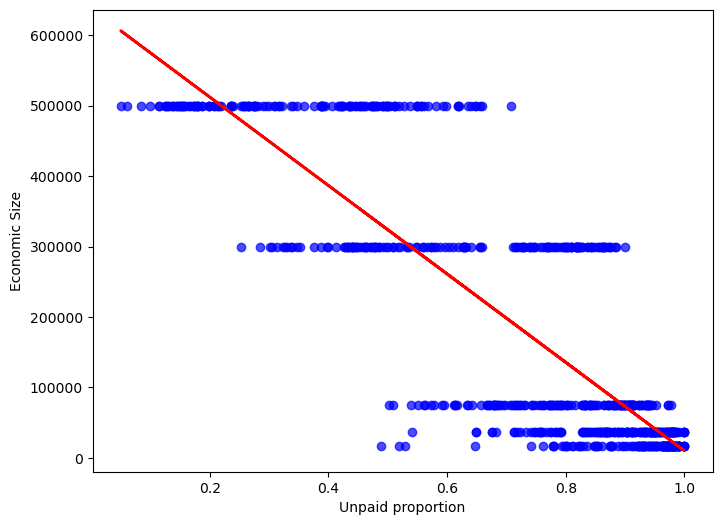

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Unpaid proportion')
plt.ylabel('Economic Size')
plt.show()

Ovviamente, essendo "Economic Size" una variabile discreta, i punti sono organizzati per linee orizzontali, ma il rapporto di reciproca dipendenza (con segno negativo) si nota anche dallo scatter plot. 

#### Conclusioni

Questa iniziale data understanding porta alla luce una problematica importante all'interno del settore agricolo: dove le aziende sono più piccole, c'è un maggior numero di ore non pagate. La preoccupazione dovuta alla possibile riduzione di terreno coltivabile, all'uso diminuito di pesticidi - che agevolano il lavoro, nonostante le gravi ripercussioni - è comprensibile alla luce della precarietà di molte persone appartenenti a questa realtà lavorativa.

##### Guardata la tipologia di situazione sociale che caratterizza l'agricoltura in Italia, cerchiamo di fare luce sui motivi che hanno acceso le proteste.

Il primo punto che leggiamo sul manifesto degli agricoltori riguarda l'"estremismo ambientalista" dell'Unione Europea. Vediamo in che modo la preservazione dell'ambiente, aspetto cruciale del Green Deal e delle future politiche agricole italiane, impatta sulle vite degli agricoltori, mettendo in luce l'urgenza inderogabile di diverse misure per tutelare gli ecosistemi.